In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model
import os
from tqdm import tqdm
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import heapq
import time

In [2]:
folder_path = '/content/drive/MyDrive/Flix Stocks/bottoms_resized_png/'

def getall_path(folder_path):
    img_path = []
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
                img_path.append(folder_path + filename)
    return img_path

print('Number of images in the database: {}'.format(len(getall_path(folder_path))))

Number of images in the database: 1050


Enter a number between 0 and 1050: 62


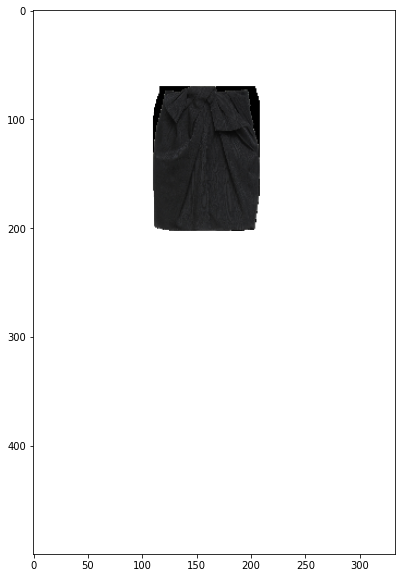

In [8]:
imgs_num = len(getall_path(folder_path))
random = int(input('Enter a number between 0 and {}: '.format(imgs_num)))
img = load_img(getall_path(folder_path)[random])
img = img_to_array(img)/255
plt.figure(figsize=(20,10))
plt.imshow(img)

In [4]:
img_path = getall_path(folder_path)
images = []

for i in tqdm(range(imgs_num)):
    img = load_img(img_path[i], target_size=(300,300))
    img = img_to_array(img)/255.
    images.append(img)
images = np.array(images)

100%|██████████| 1050/1050 [00:06<00:00, 169.35it/s]


In [5]:
model = MobileNetV2(include_top=False, pooling='avg', input_shape = (300, 300, 3))
pred = model.predict(images)

row=[]
for i in pred:
    col = []
    for j in pred:
        dist = distance.euclidean(i,j)
        col.append(dist)
    row.append(col)
distance_matrix = np.array(row)
np.savez_compressed('distance_matrix.npz', distance_matrix)     # saving the distance matrix in a compressed .npz file

In [6]:
def recommender(query_img_path, all_img_path, distance_matrix):
    query_img = load_img(query_img_path)
    plt.figure(figsize = (10,10))
    plt.imshow(query_img)
    plt.title('Query Image')
    plt.axis('off')
    plt.show()
    print('\n\n\n\n')

    start = time.time()
    img_idx = all_img_path.index(query_img_path)  # index of the query image in the list of all the image paths
    nsmallest_dist =heapq.nsmallest(11, distance_matrix[img_idx])[1:] # get a list of 10 smallest euclidean distance for the given query image
    stop = time.time()-start
    plt.figure(figsize=(20,20))
    #plt.subplots(5,2)
    for i in range(len(nsmallest_dist)):
        dist_idx = np.where(distance_matrix[img_idx] == nsmallest_dist[i])
        dist_idx = dist_idx[0][0]     # index of the closest image in the distance matrix, this will be the recommended image
        recommend_img_path = all_img_path[dist_idx]
        recommend_img = load_img(recommend_img_path) # loading the recommended image
        plt.subplot(5,2, i+1)
        plt.imshow(recommend_img)      # platting the recommended image
        plt.title('Recommendation {}'.format(i+1))
        plt.axis('off')
    plt.show()
    return time.time()-start, stop

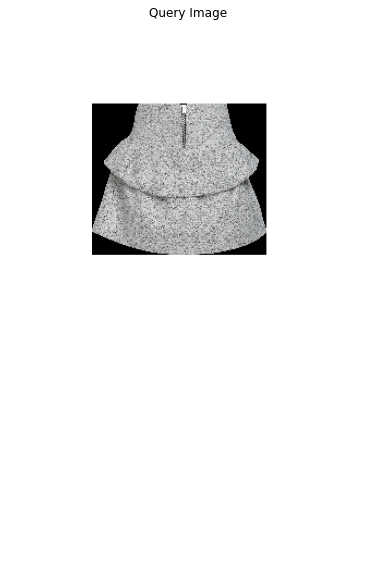

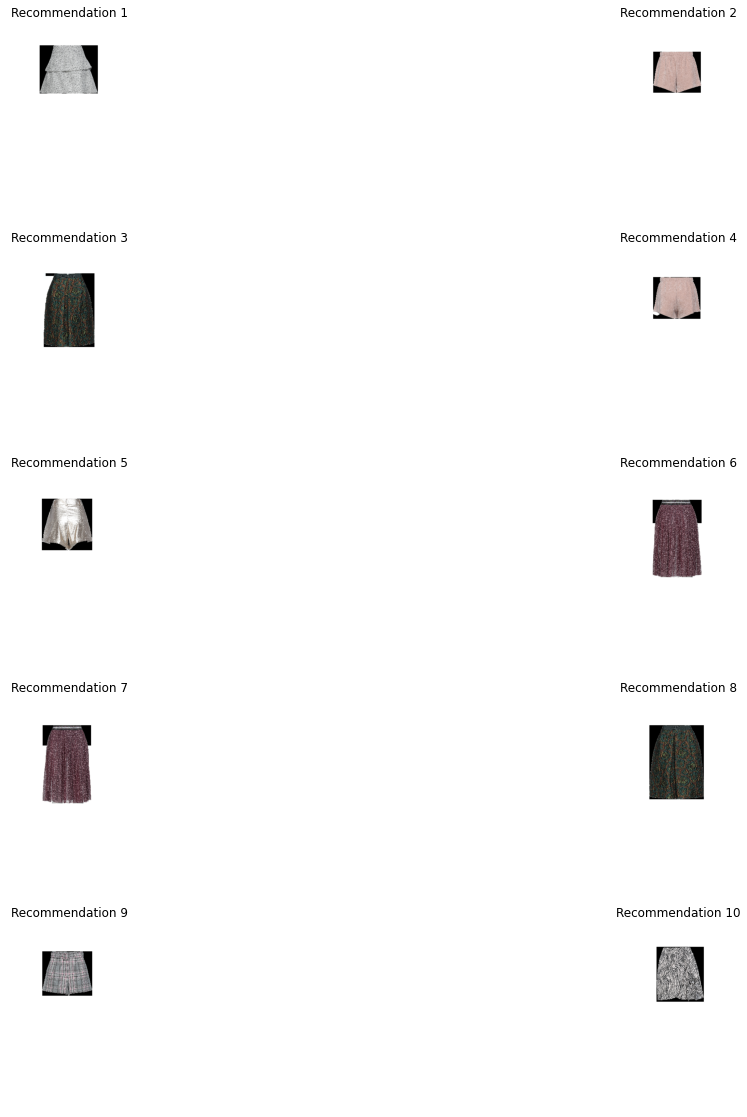

(0.8348088264465332, 0.0001246929168701172)

In [7]:
query_img_path ='/content/drive/MyDrive/Flix Stocks/bottoms_resized_png/35468285DWR.png'
all_img_paths = getall_path(folder_path)
distance_matrix = np.load('/content/distance_matrix.npz')['arr_0']
recommender(query_img_path, all_img_paths, distance_matrix)